In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.utils.data as Data

In [2]:
dtype = torch.FloatTensor
dtype

torch.FloatTensor

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cpu')

#### 文本预处理

In [5]:
sentences = ["jack like dog", "jack like cat", "jack like animal",
  "dog cat animal", "banana apple cat dog like", "dog fish milk like",
  "dog cat animal like", "jack like apple", "apple like", "jack like banana",
  "apple banana jack movie book music like", "cat dog hate", "cat dog like"]
sentences, len(sentences)

(['jack like dog',
  'jack like cat',
  'jack like animal',
  'dog cat animal',
  'banana apple cat dog like',
  'dog fish milk like',
  'dog cat animal like',
  'jack like apple',
  'apple like',
  'jack like banana',
  'apple banana jack movie book music like',
  'cat dog hate',
  'cat dog like'],
 13)

In [6]:
word_sequence = ''.join(sentences)
word_sequence

'jack like dogjack like catjack like animaldog cat animalbanana apple cat dog likedog fish milk likedog cat animal likejack like appleapple likejack like bananaapple banana jack movie book music likecat dog hatecat dog like'

In [7]:
word_sequence = ''.join(sentences).split()
word_sequence, len(word_sequence)

(['jack',
  'like',
  'dogjack',
  'like',
  'catjack',
  'like',
  'animaldog',
  'cat',
  'animalbanana',
  'apple',
  'cat',
  'dog',
  'likedog',
  'fish',
  'milk',
  'likedog',
  'cat',
  'animal',
  'likejack',
  'like',
  'appleapple',
  'likejack',
  'like',
  'bananaapple',
  'banana',
  'jack',
  'movie',
  'book',
  'music',
  'likecat',
  'dog',
  'hatecat',
  'dog',
  'like'],
 34)

In [8]:
vocab = list(set(word_sequence))
vocab, len(vocab)

(['cat',
  'jack',
  'dog',
  'animaldog',
  'music',
  'likejack',
  'movie',
  'animalbanana',
  'fish',
  'appleapple',
  'dogjack',
  'apple',
  'banana',
  'animal',
  'milk',
  'catjack',
  'likecat',
  'like',
  'bananaapple',
  'likedog',
  'book',
  'hatecat'],
 22)

In [9]:
word2idx = {w: i for i, w in enumerate(vocab)}
word2idx

{'cat': 0,
 'jack': 1,
 'dog': 2,
 'animaldog': 3,
 'music': 4,
 'likejack': 5,
 'movie': 6,
 'animalbanana': 7,
 'fish': 8,
 'appleapple': 9,
 'dogjack': 10,
 'apple': 11,
 'banana': 12,
 'animal': 13,
 'milk': 14,
 'catjack': 15,
 'likecat': 16,
 'like': 17,
 'bananaapple': 18,
 'likedog': 19,
 'book': 20,
 'hatecat': 21}

#### 模型参数

In [10]:
batch_size = 8
embedding_size = 2
C = 2 # window_size
voc_size = len(vocab) # 22

#### 数据预处理

In [11]:
word_sequence[2]

'dogjack'

In [12]:
'''
功能：
    将中心词和在一个窗口的背景词组成一个skip_grams
'''
skip_grams = []
# C为2
# word_sequence：单词的个数，34
for idx in range(C, len(word_sequence) - C): # 2---31
    center = word2idx[word_sequence[idx]]
    context_idx = list(range(idx - C, idx)) + list(range(idx + 1, idx + C + 1))
    context = [word2idx[word_sequence[i]] for i in context_idx]
    for w in context:
        skip_grams.append([center, w])

In [13]:
skip_grams

[[10, 1],
 [10, 17],
 [10, 17],
 [10, 15],
 [17, 17],
 [17, 10],
 [17, 15],
 [17, 17],
 [15, 10],
 [15, 17],
 [15, 17],
 [15, 3],
 [17, 17],
 [17, 15],
 [17, 3],
 [17, 0],
 [3, 15],
 [3, 17],
 [3, 0],
 [3, 7],
 [0, 17],
 [0, 3],
 [0, 7],
 [0, 11],
 [7, 3],
 [7, 0],
 [7, 11],
 [7, 0],
 [11, 0],
 [11, 7],
 [11, 0],
 [11, 2],
 [0, 7],
 [0, 11],
 [0, 2],
 [0, 19],
 [2, 11],
 [2, 0],
 [2, 19],
 [2, 8],
 [19, 0],
 [19, 2],
 [19, 8],
 [19, 14],
 [8, 2],
 [8, 19],
 [8, 14],
 [8, 19],
 [14, 19],
 [14, 8],
 [14, 19],
 [14, 0],
 [19, 8],
 [19, 14],
 [19, 0],
 [19, 13],
 [0, 14],
 [0, 19],
 [0, 13],
 [0, 5],
 [13, 19],
 [13, 0],
 [13, 5],
 [13, 17],
 [5, 0],
 [5, 13],
 [5, 17],
 [5, 9],
 [17, 13],
 [17, 5],
 [17, 9],
 [17, 5],
 [9, 5],
 [9, 17],
 [9, 5],
 [9, 17],
 [5, 17],
 [5, 9],
 [5, 17],
 [5, 18],
 [17, 9],
 [17, 5],
 [17, 18],
 [17, 12],
 [18, 5],
 [18, 17],
 [18, 12],
 [18, 1],
 [12, 17],
 [12, 18],
 [12, 1],
 [12, 6],
 [1, 18],
 [1, 12],
 [1, 6],
 [1, 20],
 [6, 12],
 [6, 1],
 [6, 20],
 [6,

In [14]:
len(skip_grams)

120

In [19]:
skip_grams[0], skip_grams[1]

([10, 1], [10, 17])

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [75]:
def make_data(skip_grams):
    input_data = []
    output_data = []
    for i in range(len(skip_grams)):
        # 构建对角阵，有多少个词汇，对角阵就是多少行
        input_data.append(np.eye(voc_size)[skip_grams[i][0]])
        output_data.append(skip_grams[i][1])
    return input_data, output_data

In [89]:
input_data, output_data = make_data(skip_grams)
#input_data, output_data

In [90]:
input_data, output_data = torch.tensor(input_data, dtype = torch.float32), torch.LongTensor(output_data)

In [91]:
dataset = Data.TensorDataset(input_data, output_data)

In [92]:
loader = Data.DataLoader(dataset, batch_size, True)

#### 构建模型

In [93]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.w = nn.Parameter(torch.randn(voc_size, embedding_size).type(dtype))
        self.v = nn.Parameter(torch.randn(embedding_size, voc_size).type(dtype))
    
    def forward(self, x):
        hidden_layer = torch.matmul(x, self.w)
        output_layer = torch.matmul(hidden_layer, self.v)
        return output_layer

In [94]:
model = Word2Vec().to(device)
model

Word2Vec()

In [95]:
criterion = nn.CrossEntropyLoss().to(device)
criterion

CrossEntropyLoss()

In [96]:
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

#### 训练

In [97]:
import math

In [98]:
len(input_data)

120

In [99]:
epoch_list = []
loss_list = []
for epoch in range(3500):
    epoch_list.append(epoch)
    train_loss = 0.0
    for i, (batch_x, batch_y) in enumerate(loader):
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        pred = model(batch_x)
        loss = criterion(pred, batch_y)
        train_loss += loss.item()
        if (epoch + 1) % 500 == 0:
            print(epoch + 1, i, loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append( train_loss / math.ceil(len(input_data) / batch_size))
    #print('Loss :%.3f'%(train_loss / math.ceil(len(input_data) / batch_size)))

500 0 2.3090765476226807
500 1 2.0188045501708984
500 2 1.954380989074707
500 3 2.211962938308716
500 4 2.0766427516937256
500 5 2.275336980819702
500 6 2.416743516921997
500 7 1.9096873998641968
500 8 1.8954373598098755
500 9 1.9421701431274414
500 10 2.3931097984313965
500 11 2.52700138092041
500 12 2.400707721710205
500 13 2.5670433044433594
500 14 2.3080248832702637
1000 0 2.1691524982452393
1000 1 1.673717737197876
1000 2 2.145174980163574
1000 3 1.8062163591384888
1000 4 2.269188404083252
1000 5 2.2611212730407715
1000 6 1.9780941009521484
1000 7 2.2530269622802734
1000 8 2.498270034790039
1000 9 2.3311731815338135
1000 10 1.897228479385376
1000 11 2.1644790172576904
1000 12 2.243744134902954
1000 13 2.3976199626922607
1000 14 1.7794663906097412
1500 0 2.2095694541931152
1500 1 2.1851613521575928
1500 2 2.2074484825134277
1500 3 2.1590588092803955
1500 4 2.400043487548828
1500 5 2.2095069885253906
1500 6 1.6491806507110596
1500 7 2.276275634765625
1500 8 1.7518327236175537
1500 9

In [100]:
len(epoch_list), len(loss_list)

(3500, 3500)

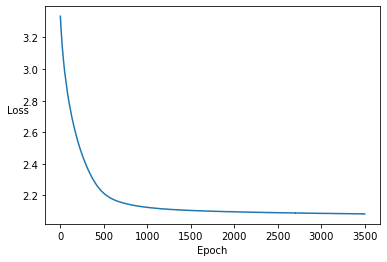

In [101]:
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss', rotation = 0)
plt.show()

In [102]:
model.parameters()

<generator object Module.parameters at 0x00000243F8417F20>

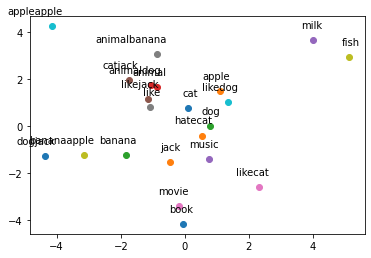

In [103]:
for i, label in enumerate(vocab):
    W, WT = model.parameters()
    x, y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy = (x, y), xytext = (10, 10), textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()